In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm

In [7]:
data = pd.read_csv('cost-of-living.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(55, 161)
['Unnamed: 0', 'Saint Petersburg, Russia', 'Istanbul, Turkey', 'Izmir, Turkey', 'Helsinki, Finland', 'Chisinau, Moldova', 'Milan, Italy', 'Cairo, Egypt', 'Banja Luka, Bosnia And Herzegovina', 'Baku, Azerbaijan', 'Guadalajara, Mexico', 'Kathmandu, Nepal', 'Hanoi, Vietnam', 'Ho Chi Minh City, Vietnam', 'Mexico City, Mexico', 'Rome, Italy', 'Monterrey, Mexico', 'Yekaterinburg, Russia', 'Sarajevo, Bosnia And Herzegovina', 'Kharkiv, Ukraine', 'Kiev, Ukraine', 'Calgary, Canada', 'Tunis, Tunisia', 'Edmonton, Canada', 'Amsterdam, Netherlands', 'Belgrade, Serbia', 'Odessa, Ukraine', 'Paris, France', 'Eindhoven, Netherlands', 'Plovdiv, Bulgaria', 'Thessaloniki, Greece', 'Ottawa, Canada', 'Sofia, Bulgaria', 'Rotterdam, Netherlands', 'Varna, Bulgaria', 'Novi Sad, Serbia', 'Utrecht, Netherlands', 'Berlin, Germany', 'Beirut, Lebanon', 'Austin, TX, United States', 'Singapore, Singapore', 'Toronto, Canada', 'Auckland, New Zealand', 'Podgorica, Montenegro', 'Vancouver, Canada', 'Tokyo, Japan'

In [8]:
data.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,...,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,...,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,...,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,...,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,...,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


In [9]:
dd = data['Unnamed: 0'][3] 
print(dd)

Domestic Beer (0.5 liter draught)


In [10]:
data.mean()

Saint Petersburg, Russia     947.569636
Istanbul, Turkey            1030.352000
Izmir, Turkey                973.539818
Helsinki, Finland           1235.551636
Chisinau, Moldova            726.469091
                               ...     
Melbourne, Australia        1173.578182
Perth, Australia            1059.191273
Sydney, Australia           1256.769818
Alexandria, Egypt            928.888000
Quito, Ecuador              1067.515636
Length: 160, dtype: float64

In [11]:
data['New York, NY, United States']
print(data)

                                           Unnamed: 0  \
0                        Meal, Inexpensive Restaurant   
1   Meal for 2 People, Mid-range Restaurant, Three...   
2      McMeal at McDonalds (or Equivalent Combo Meal)   
3                   Domestic Beer (0.5 liter draught)   
4                   Imported Beer (0.33 liter bottle)   
5                      Coke/Pepsi (0.33 liter bottle)   
6                          Water (0.33 liter bottle)    
7                           Milk (regular), (1 liter)   
8                    Loaf of Fresh White Bread (500g)   
9                                 Eggs (regular) (12)   
10                                 Local Cheese (1kg)   
11                           Water (1.5 liter bottle)   
12                         Bottle of Wine (Mid-Range)   
13                   Domestic Beer (0.5 liter bottle)   
14                  Imported Beer (0.33 liter bottle)   
15                      Cigarettes 20 Pack (Marlboro)   
16                   One-way Ti

In [12]:
X = data['San Francisco, CA, United States'].values.reshape(-1,1)
y = data['New York, NY, United States'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

1.1015323452007946
-160.0888965923359
The linear model is: Y = -160.09 + 1.1015X


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(regressor.intercept_)
print(regressor.coef_)

[-207.01856146]
[[1.10443847]]


In [17]:
y_pred = regressor.predict(X_test)


In [18]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1.94,-205.726368
1,75.39,-121.755912
2,1.59,-204.864906
3,0.09,-206.919162
4,2.07,-205.096839
5,8.09,-197.100704
6,34.37,-164.619169
7,5.70,-203.583758
8,4.22,-202.534541
9,14.38,-192.130731


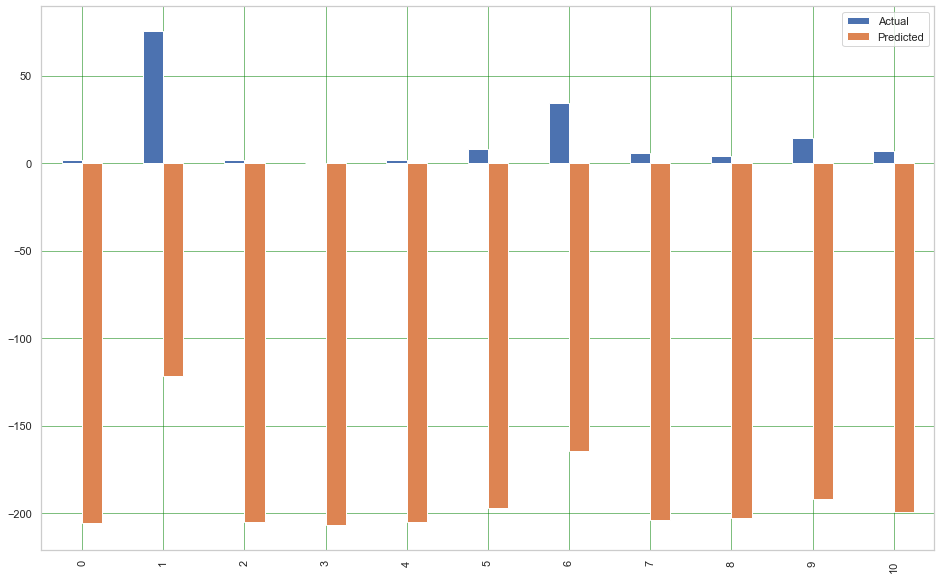

In [19]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

2063.774727272727


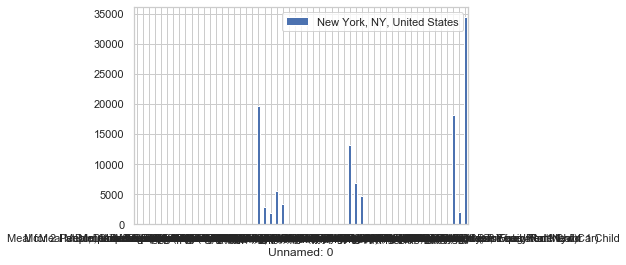

In [39]:

# data.set_index('Unnamed: 0')[['New York, NY, United States', 'Bucharest, Romania']].plot.bar()
# plt.figure(figsize=(2000, 1800))
# plt.show()
# plt.savefig('cost')
d1 = data['New York, NY, United States'].mean()
print(d1)
ax = data.plot.bar(x='Unnamed: 0', y='New York, NY, United States', rot=0)

In [32]:
data = pd.read_csv('cost-of-living.csv')
≈ = data['New York, NY, United States'].mean()
print(city_1)
city_2 = data['San Francisco, CA, United States'].mean()
print(city_2)

2063.774727272727
2018.8818181818183


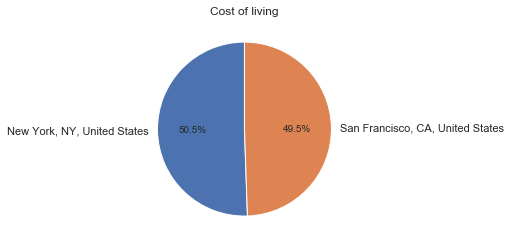

In [34]:
cities = [city_1, city_2 ]
expenses = ['New York, NY, United States', 'San Francisco, CA, United States']
plt.pie(cities, labels=expenses, startangle=90, autopct='%.1f%%')
plt.title('Cost of living')
plt.show()